In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [2]:
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False

1. 快速了解数据

用pandas加载csv文件

In [3]:
data = pd.read_csv('Online Survey Data on Education Bd.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8783 entries, 0 to 8782
Data columns (total 17 columns):
 #   Column                                                           Non-Null Count  Dtype  
---  ------                                                           --------------  -----  
 0   Level of study?                                                  8783 non-null   object 
 1   Age?                                                             8338 non-null   float64
 2   Used smartphone/computer/laptop previously before online class?  8595 non-null   object 
 3   Result increased after online education  (comparatively)?        8460 non-null   object 
 4   Knowledge increased after online education (comparatively)?      8783 non-null   object 
 5   Happy with online education?                                     8783 non-null   object 
 6   Education Institute Area?                                        8254 non-null   object 
 7   Have Internet availability?               

填补缺失数据

In [4]:
data['Age?'] = data['Age?'].fillna(data['Age?'].median())
data = data.astype({'Age?':int})
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8783 entries, 0 to 8782
Data columns (total 17 columns):
 #   Column                                                           Non-Null Count  Dtype 
---  ------                                                           --------------  ----- 
 0   Level of study?                                                  8783 non-null   object
 1   Age?                                                             8783 non-null   int32 
 2   Used smartphone/computer/laptop previously before online class?  8595 non-null   object
 3   Result increased after online education  (comparatively)?        8460 non-null   object
 4   Knowledge increased after online education (comparatively)?      8783 non-null   object
 5   Happy with online education?                                     8783 non-null   object
 6   Education Institute Area?                                        8254 non-null   object
 7   Have Internet availability?                        

In [5]:
lack = ['Used smartphone/computer/laptop previously before online class?', 'Result increased after online education  (comparatively)?', 'Education Institute Area?', 'Institute Type', 'Current location (During Study) ?', 'Gender', 'Faced any issue with online class?']

In [6]:
for i in lack:
    data[i] = data[i].fillna(method='ffill')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8783 entries, 0 to 8782
Data columns (total 17 columns):
 #   Column                                                           Non-Null Count  Dtype 
---  ------                                                           --------------  ----- 
 0   Level of study?                                                  8783 non-null   object
 1   Age?                                                             8783 non-null   int32 
 2   Used smartphone/computer/laptop previously before online class?  8783 non-null   object
 3   Result increased after online education  (comparatively)?        8783 non-null   object
 4   Knowledge increased after online education (comparatively)?      8783 non-null   object
 5   Happy with online education?                                     8783 non-null   object
 6   Education Institute Area?                                        8783 non-null   object
 7   Have Internet availability?                        

In [7]:
data.nunique()

Level of study?                                                     2
Age?                                                               11
Used smartphone/computer/laptop previously before online class?     2
Result increased after online education  (comparatively)?           2
Knowledge increased after online education (comparatively)?         2
Happy with online education?                                        2
Education Institute Area?                                           2
Have Internet availability?                                         2
Broadband / Mobile Internet?                                        2
Total hours of study before online education?                       4
Total hours of study after online education?                        3
Class performance increased in online education?                    2
Institute Type                                                      2
Current location (During Study) ?                                   2
Gender              

In [8]:
order = ['Level of study?', 'Age?', 'Used smartphone/computer/laptop previously before online class?', 'Happy with online education?', 'Education Institute Area?', 'Have Internet availability?', 'Broadband / Mobile Internet?', 'Total hours of study before online education?', 'Total hours of study after online education?', 'Institute Type', 'Current location (During Study) ?', 'Gender', 'Faced any issue with online class?', 'Preferred device for an online course', 'Knowledge increased after online education (comparatively)?', 'Class performance increased in online education?',]
data = data[order]
data

,Level of study?,Age?,Used smartphone/computer/laptop previously before online class?,Happy with online education?,Education Institute Area?,Have Internet availability?,Broadband / Mobile Internet?,Total hours of study before online education?,Total hours of study after online education?,Institute Type,Current location (During Study) ?,Gender,Faced any issue with online class?,Preferred device for an online course,Knowledge increased after online education (comparatively)?,Class performance increased in online education?
0,Upto HSC,20,Yes,No,Urban,No,Broadband,4,3,Public,Rural,Male,Yes,Mobile,Yes,No
1,Hons or Grater,25,No,No,Urban,No,Mobile Internet,4,4,Public,Rural,Male,Yes,Mobile,No,No
2,Hons or Grater,25,Yes,Yes,Rural,No,Mobile Internet,5,2,Public,Rural,Female,Yes,Computer,Yes,Yes
3,Upto HSC,21,Yes,Yes,Urban,Yes,Mobile Internet,5,3,Private,Urban,Male,Yes,Mobile,No,No
4,Hons or Grater,22,Yes,No,Rural,No,Mobile Internet,4,2,Public,Urban,Male,No,Mobile,No,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8778,Hons or Grater,22,Yes,Yes,Rural,No,Broadband,6,3,Private,Urban,Male,Yes,Computer,Yes,Yes
8779,Upto HSC,17,Yes,No,Urban,Yes,Mobile Internet,4,3,Private,Rural,Male,Yes,Computer,No,Yes
8780,Hons or Grater,24,Yes,No,Urban,Yes,Broadband,5,3,Private,Urban,Female,No,Computer,Yes,No
8781,Hons or Grater,25,Yes,No,Urban,No,Mobile Internet,5,3,Public,Urban,Male,Yes,Computer,Yes,No


In [9]:
level_study = ['Upto HSC', 'Hons or Grater']
used_digit = ['No', 'Yes']
happiness = ['No', 'Yes']
area = ['Rural', 'Urban']
internet_avail = ['No', 'Yes']
broad_mobile = ['Mobile Internet', 'Broadband']
institution = ['Private', 'Public']
current_location = ['Rural', 'Urban']
gender = ['Male', 'Female']
faced_online =['No', 'Yes']
preferred_device = ['Mobile', 'Computer']


knowledge_increase = ['No', 'Yes']
performance_increase = ['No', 'Yes']

In [10]:
lst = [level_study, used_digit, happiness, area, internet_avail, broad_mobile, institution, current_location, gender, faced_online, preferred_device, knowledge_increase, performance_increase]

llst = ['Level of study?', 'Used smartphone/computer/laptop previously before online class?', 'Happy with online education?', 'Education Institute Area?', 'Have Internet availability?', 'Broadband / Mobile Internet?', 'Institute Type', 'Current location (During Study) ?', 'Gender', 'Faced any issue with online class?', 'Preferred device for an online course', 'Knowledge increased after online education (comparatively)?', 'Class performance increased in online education?',]

In [11]:
data2 = data.copy()
for x, y in zip(llst, lst):
    for i in range(len(y)):
        data2.loc[data2[x] == y[i], x] = i


for i in llst:
    data2 = data2.astype({i:int})
data2.describe()

,Level of study?,Age?,Used smartphone/computer/laptop previously before online class?,Happy with online education?,Education Institute Area?,Have Internet availability?,Broadband / Mobile Internet?,Total hours of study before online education?,Total hours of study after online education?,Institute Type,Current location (During Study) ?,Gender,Faced any issue with online class?,Preferred device for an online course,Knowledge increased after online education (comparatively)?,Class performance increased in online education?
count,8783.000000,8783.000000,8783.000000,8783.000000,8783.000000,8783.000000,8783.000000,8783.000000,8783.000000,8783.000000,8783.000000,8783.000000,8783.000000,8783.000000,8783.000000,8783.000000
mean,0.641922,22.822840,0.866333,0.356940,0.790391,0.696231,0.495844,4.503473,2.983263,0.352727,0.540134,0.445406,0.621542,0.638392,0.367414,0.465445
std,0.479463,2.003423,0.340314,0.479124,0.407053,0.459910,0.500011,0.962023,0.707714,0.477846,0.498415,0.497039,0.485030,0.480493,0.482128,0.498833
min,0.000000,16.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,22.000000,1.000000,0.000000,1.000000,0.000000,0.000000,4.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,23.000000,1.000000,0.000000,1.000000,1.000000,0.000000,4.000000,3.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000
75%,1.000000,24.000000,1.000000,1.000000,1.000000,1.000000,1.000000,5.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
max,1.000000,26.000000,1.000000,1.000000,1.000000,1.000000,1.000000,6.000000,4.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [12]:
data2.corr()

,Level of study?,Age?,Used smartphone/computer/laptop previously before online class?,Happy with online education?,Education Institute Area?,Have Internet availability?,Broadband / Mobile Internet?,Total hours of study before online education?,Total hours of study after online education?,Institute Type,Current location (During Study) ?,Gender,Faced any issue with online class?,Preferred device for an online course,Knowledge increased after online education (comparatively)?,Class performance increased in online education?
Level of study?,1.000000,0.437881,0.091851,-0.001202,0.015040,-0.022387,0.022528,-0.007055,0.007840,0.000162,-0.005374,0.008984,0.002325,-0.023852,-0.008612,0.019436
Age?,0.437881,1.000000,0.074992,0.000996,0.014221,-0.011205,0.012451,-0.003226,-0.002252,-0.007155,0.002902,0.021390,0.002358,-0.000197,-0.017130,-0.018888
Used smartphone/computer/laptop previously before online class?,0.091851,0.074992,1.000000,0.021682,0.013907,0.006821,0.031533,0.022982,-0.017800,-0.027938,0.014848,-0.000063,0.005305,0.013560,-0.026827,0.032487
Happy with online education?,-0.001202,0.000996,0.021682,1.000000,-0.002262,0.003780,-0.003076,-0.008248,-0.016297,-0.004873,-0.003968,0.001268,0.014439,-0.017984,-0.003867,0.005637
Education Institute Area?,0.015040,0.014221,0.013907,-0.002262,1.000000,0.029051,0.018378,-0.004684,0.008770,-0.023786,0.037822,-0.010698,0.001879,-0.007988,-0.023551,-0.025301
Have Internet availability?,-0.022387,-0.011205,0.006821,0.003780,0.029051,1.000000,0.053930,-0.011513,-0.000229,-0.033122,0.032825,-0.004810,-0.009559,0.002695,0.002188,0.031173
Broadband / Mobile Internet?,0.022528,0.012451,0.031533,-0.003076,0.018378,0.053930,1.000000,0.015713,-0.008402,-0.002443,0.045104,0.020278,0.009947,-0.011943,-0.003821,0.021452
Total hours of study before online education?,-0.007055,-0.003226,0.022982,-0.008248,-0.004684,-0.011513,0.015713,1.000000,0.011542,-0.005142,0.011287,0.009863,-0.014998,0.020946,-0.011467,-0.005979
Total hours of study after online education?,0.007840,-0.002252,-0.017800,-0.016297,0.008770,-0.000229,-0.008402,0.011542,1.000000,-0.005438,0.009168,0.003391,-0.014806,0.001287,-0.007672,-0.004703
Institute Type,0.000162,-0.007155,-0.027938,-0.004873,-0.023786,-0.033122,-0.002443,-0.005142,-0.005438,1.000000,-0.038410,0.009173,-0.009598,-0.016733,0.016682,0.010535


<AxesSubplot:>

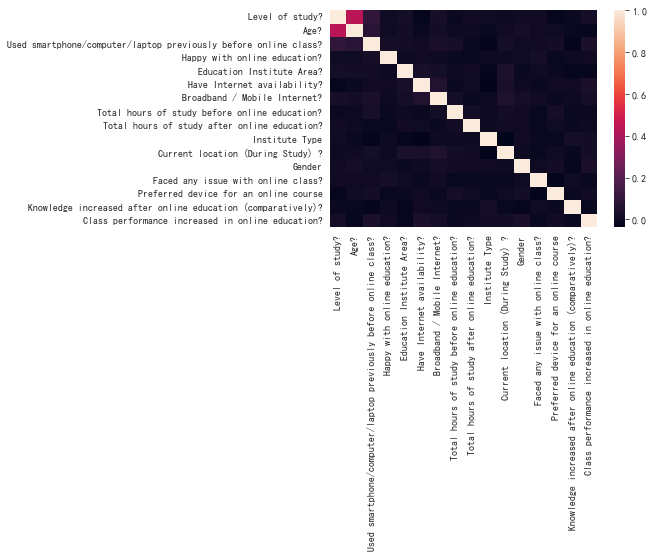

In [13]:
sns.heatmap(data2.corr())

In [14]:
Know_increase = data2.groupby('Knowledge increased after online education (comparatively)?')['Knowledge increased after online education (comparatively)?'].count()
Know_increase

Knowledge increased after online education (comparatively)?
0    5556
1    3227
Name: Knowledge increased after online education (comparatively)?, dtype: int64

In [15]:
Perf_increase = data2.groupby('Class performance increased in online education?')['Class performance increased in online education?'].count()
Perf_increase

Class performance increased in online education?
0    4695
1    4088
Name: Class performance increased in online education?, dtype: int64

In [16]:
Level_study = data2.groupby('Level of study?')['Level of study?'].count()
Level_study

Level of study?
0    3145
1    5638
Name: Level of study?, dtype: int64

In [17]:
Age = data2.groupby('Age?')['Age?'].count()
Age

Age?
16      13
17      37
18     359
19     142
20     390
21    1027
22    1768
23    1551
24    1669
25    1038
26     789
Name: Age?, dtype: int64

In [18]:
Used_digit = data2.groupby('Used smartphone/computer/laptop previously before online class?')['Used smartphone/computer/laptop previously before online class?'].count()
Used_digit

Used smartphone/computer/laptop previously before online class?
0    1174
1    7609
Name: Used smartphone/computer/laptop previously before online class?, dtype: int64

In [19]:
Happiness = data2.groupby('Happy with online education?')['Happy with online education?'].count()
Happiness

Happy with online education?
0    5648
1    3135
Name: Happy with online education?, dtype: int64

In [20]:
Area = data2.groupby('Education Institute Area?')['Education Institute Area?'].count()
Area

Education Institute Area?
0    1841
1    6942
Name: Education Institute Area?, dtype: int64

In [21]:
Internet_avail = data2.groupby('Have Internet availability?')['Have Internet availability?'].count()
Internet_avail

Have Internet availability?
0    2668
1    6115
Name: Have Internet availability?, dtype: int64

In [22]:
Broad_mobile = data2.groupby('Broadband / Mobile Internet?')['Broadband / Mobile Internet?'].count()
Broad_mobile

Broadband / Mobile Internet?
0    4428
1    4355
Name: Broadband / Mobile Internet?, dtype: int64

In [23]:
Total_hour_before = data2.groupby('Total hours of study before online education?')['Total hours of study before online education?'].count()
Total_hour_before

Total hours of study before online education?
3    1465
4    2932
5    2885
6    1501
Name: Total hours of study before online education?, dtype: int64

In [24]:
Total_hour_after = data2.groupby('Total hours of study after online education?')['Total hours of study after online education?'].count()
Total_hour_after

Total hours of study after online education?
2    2274
3    4382
4    2127
Name: Total hours of study after online education?, dtype: int64

In [25]:
Institution_type = data2.groupby('Institute Type')['Institute Type'].count()
Institution_type

Institute Type
0    5685
1    3098
Name: Institute Type, dtype: int64

In [26]:
Current_location = data2.groupby('Current location (During Study) ?')['Current location (During Study) ?'].count()
Current_location

Current location (During Study) ?
0    4039
1    4744
Name: Current location (During Study) ?, dtype: int64

In [27]:
Gender = data2.groupby('Gender')['Gender'].count()
Gender

Gender
0    4871
1    3912
Name: Gender, dtype: int64

In [28]:
Faced_online = data2.groupby('Faced any issue with online class?')['Faced any issue with online class?'].count()
Faced_online

Faced any issue with online class?
0    3324
1    5459
Name: Faced any issue with online class?, dtype: int64

In [29]:
Prefer_device = data2.groupby('Preferred device for an online course')['Preferred device for an online course'].count()
Prefer_device

Preferred device for an online course
0    3176
1    5607
Name: Preferred device for an online course, dtype: int64

In [30]:
variable = ['Knowledge increased after online education (comparatively)?', 'Class performance increased in online education?']

学历

In [122]:
Levelk = data2.groupby(['Level of study?', 'Knowledge increased after online education (comparatively)?'])['Knowledge increased after online education (comparatively)?'].count()
Levelk

Level of study?  Knowledge increased after online education (comparatively)?
0                0                                                              1972
                 1                                                              1173
1                0                                                              3584
                 1                                                              2054
Name: Knowledge increased after online education (comparatively)?, dtype: int64

In [123]:
Levelc = data2.groupby(['Level of study?', 'Class performance increased in online education?'])['Class performance increased in online education?'].count()
Levelc

Level of study?  Class performance increased in online education?
0                0                                                   1722
                 1                                                   1423
1                0                                                   2973
                 1                                                   2665
Name: Class performance increased in online education?, dtype: int64

Text(0.5, 1.0, '课堂表现与教育程度的关系')

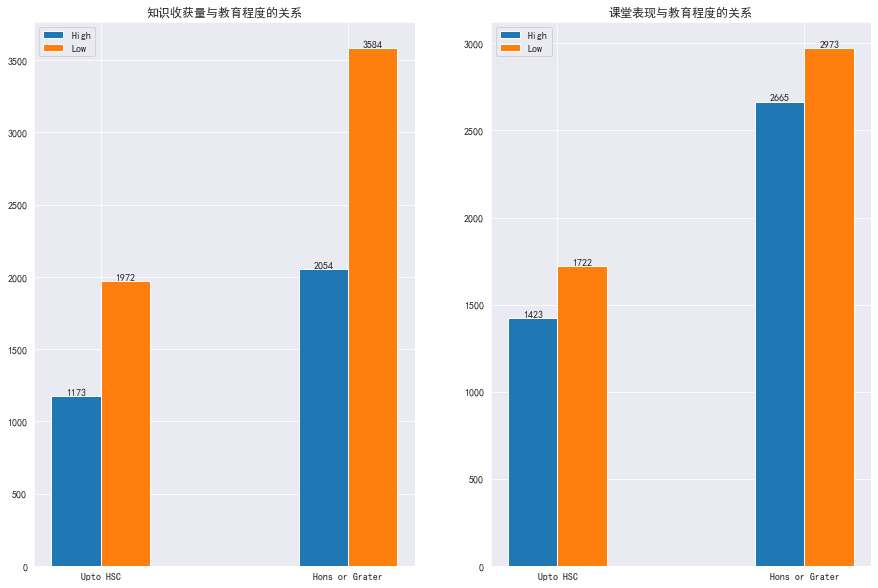

In [42]:
plt.figure(figsize=(15, 10))
plt.subplot(121)
High = [Levelk[0][1], Levelk[1][1]]
Low = [Levelk[0][0], Levelk[1][0]]


width = 0.2
x = np.arange(2)
plt.bar(x, High, width=width, label='High')
for i in range(2):
    plt.text(x[i], High[i], High[i], va='bottom', ha='center')
plt.bar(x+width, Low, width=width, label='Low')
for i in range(2):
    plt.text(x[i]+width, Low[i], Low[i], va='bottom', ha='center')
plt.xticks(x+width/2, labels=level_study)
plt.legend()
plt.title("知识收获量与教育程度的关系")


plt.subplot(122)
High = [Levelc[0][1], Levelc[1][1]]
Low = [Levelc[0][0], Levelc[1][0]]


width = 0.2
x = np.arange(2)
plt.bar(x, High, width=width, label='High')
for i in range(2):
    plt.text(x[i], High[i], High[i], va='bottom', ha='center')
plt.bar(x+width, Low, width=width, label='Low')
for i in range(2):
    plt.text(x[i]+width, Low[i], Low[i], va='bottom', ha='center')
plt.xticks(x+width/2, labels=level_study)
plt.legend()
plt.title("课堂表现与教育程度的关系")

Text(0.5, 1.0, '课堂表现，大学')

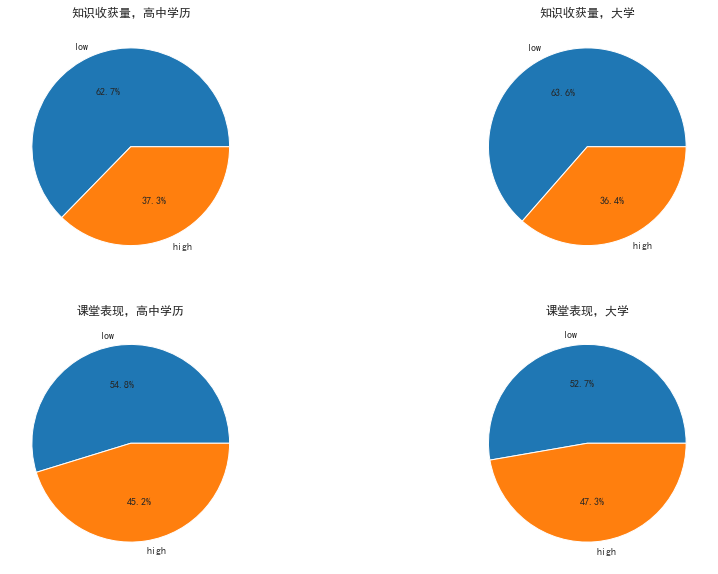

In [124]:
plt.figure(figsize=(15, 10))
labels = ['low', 'high']
plt.subplot(221)
hsc = [Levelk[0][0], Levelk[0][1]]
plt.pie(hsc, labels=labels, autopct='%1.1f%%')
plt.title("知识收获量，高中学历")


plt.subplot(222)
college = [Levelk[1][0], Levelk[1][1]]
plt.pie(college, labels=labels, autopct='%1.1f%%')
plt.title("知识收获量，大学")


plt.subplot(223)
hsc = [Levelc[0][0], Levelc[0][1]]
plt.pie(hsc, labels=labels, autopct='%1.1f%%')
plt.title("课堂表现，高中学历")


plt.subplot(224)
college = [Levelc[1][0], Levelc[1][1]]
plt.pie(college, labels=labels, autopct='%1.1f%%')
plt.title("课堂表现，大学")

年龄

In [34]:
Agek = data2.groupby(['Age?', 'Knowledge increased after online education (comparatively)?'])['Knowledge increased after online education (comparatively)?'].count()
Agek

Age?  Knowledge increased after online education (comparatively)?
16    0                                                                 4
      1                                                                 9
17    0                                                                25
      1                                                                12
18    0                                                               227
      1                                                               132
19    0                                                                96
      1                                                                46
20    0                                                               244
      1                                                               146
21    0                                                               650
      1                                                               377
22    0                                       

In [35]:
Agec = data2.groupby(['Age?', 'Class performance increased in online education?'])['Class performance increased in online education?'].count()
Agec

Age?  Class performance increased in online education?
16    0                                                     8
      1                                                     5
17    0                                                    15
      1                                                    22
18    0                                                   192
      1                                                   167
19    0                                                    72
      1                                                    70
20    0                                                   213
      1                                                   177
21    0                                                   536
      1                                                   491
22    0                                                   901
      1                                                   867
23    0                                                   850
      1        

Text(0.5, 1.0, '课堂表现与年龄的关系')

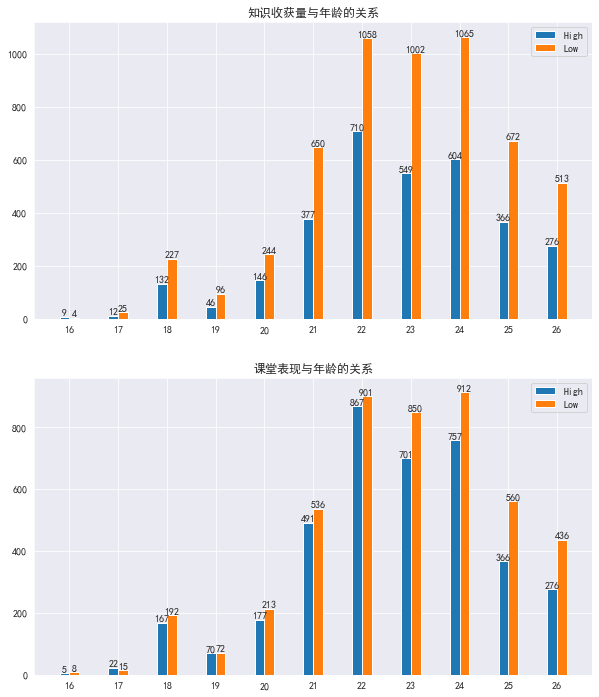

In [36]:
plt.figure(figsize=(10, 12))
plt.subplot(211)
High = [Agek[16][1], Agek[17][1], Agek[18][1], Agek[19][1], Agek[20][1], Agek[21][1], Agek[22][1], Agek[23][1], Agek[24][1], Agek[25][1], Agek[26][1]]
Low = [Agek[16][0], Agek[17][0], Agek[18][0], Agek[19][0], Agek[20][0], Agek[21][0], Agek[22][0], Agek[23][0], Agek[24][0], Agek[25][0], Agek[26][0]]


width = 0.2
x = np.arange(11)
plt.bar(x, High, width=width, label='High')
for i in range(11):
    plt.text(x[i], High[i], High[i], va='bottom', ha='center')
plt.bar(x+width, Low, width=width, label='Low')
for i in range(11):
    plt.text(x[i]+width, Low[i], Low[i], va='bottom', ha='center')
plt.xticks(x+width/2, labels=['16', '17', '18', '19', '20', '21', '22', '23', '24', '25', '26'])
plt.legend()
plt.title("知识收获量与年龄的关系")


plt.subplot(212)
High = [Agec[16][1], Agec[17][1], Agec[18][1], Agec[19][1], Agec[20][1], Agec[21][1], Agec[22][1], Agec[23][1], Agec[24][1], Agek[25][1], Agek[26][1]]
Low = [Agec[16][0], Agec[17][0], Agec[18][0], Agec[19][0], Agec[20][0], Agec[21][0], Agec[22][0], Agec[23][0], Agec[24][0], Agec[25][0], Agec[26][0]]


width = 0.2
x = np.arange(11)
plt.bar(x, High, width=width, label='High')
for i in range(11):
    plt.text(x[i], High[i], High[i], va='bottom', ha='center')
plt.bar(x+width, Low, width=width, label='Low')
for i in range(11):
    plt.text(x[i]+width, Low[i], Low[i], va='bottom', ha='center')
plt.xticks(x+width/2, labels=['16', '17', '18', '19', '20', '21', '22', '23', '24', '25', '26'])
plt.legend()
plt.title("课堂表现与年龄的关系")

是否使用过智能设备

In [126]:
Usedk = data2.groupby(['Used smartphone/computer/laptop previously before online class?', 'Knowledge increased after online education (comparatively)?'])['Knowledge increased after online education (comparatively)?'].count()
Usedk

Used smartphone/computer/laptop previously before online class?  Knowledge increased after online education (comparatively)?
0                                                                0                                                               704
                                                                 1                                                               470
1                                                                0                                                              4852
                                                                 1                                                              2757
Name: Knowledge increased after online education (comparatively)?, dtype: int64

In [127]:
Usedc = data2.groupby([ 'Used smartphone/computer/laptop previously before online class?', 'Class performance increased in online education?'])['Class performance increased in online education?'].count()
Usedc

Used smartphone/computer/laptop previously before online class?  Class performance increased in online education?
0                                                                0                                                    676
                                                                 1                                                    498
1                                                                0                                                   4019
                                                                 1                                                   3590
Name: Class performance increased in online education?, dtype: int64

Text(0.5, 1.0, '课堂表现与是否使用过智能设备的关系')

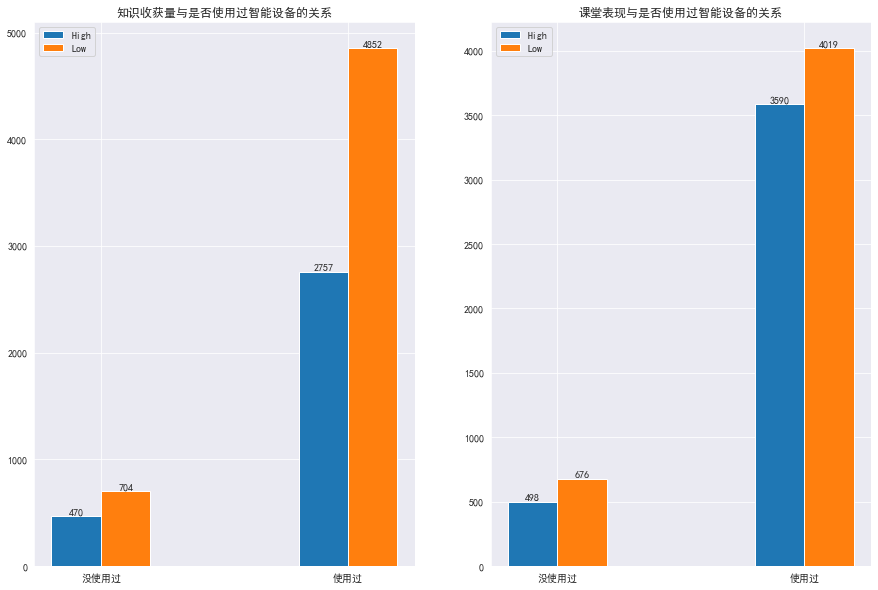

In [113]:
plt.figure(figsize=(15, 10))
plt.subplot(121)
High = [Usedk[0][1], Usedk[1][1]]
Low = [Usedk[0][0], Usedk[1][0]]


width = 0.2
x = np.arange(2)
plt.bar(x, High, width=width, label='High')
for i in range(2):
    plt.text(x[i], High[i], High[i], va='bottom', ha='center')
plt.bar(x+width, Low, width=width, label='Low')
for i in range(2):
    plt.text(x[i]+width, Low[i], Low[i], va='bottom', ha='center')
plt.xticks(x+width/2, labels=['没使用过', '使用过'])
plt.legend()
plt.title("知识收获量与是否使用过智能设备的关系")


plt.subplot(122)
High = [Usedc[0][1], Usedc[1][1]]
Low = [Usedc[0][0], Usedc[1][0]]


width = 0.2
x = np.arange(2)
plt.bar(x, High, width=width, label='High')
for i in range(2):
    plt.text(x[i], High[i], High[i], va='bottom', ha='center')
plt.bar(x+width, Low, width=width, label='Low')
for i in range(2):
    plt.text(x[i]+width, Low[i], Low[i], va='bottom', ha='center')
plt.xticks(x+width/2, labels=['没使用过', '使用过'])
plt.legend()
plt.title("课堂表现与是否使用过智能设备的关系")

Text(0.5, 1.0, '课堂表现，接触过')

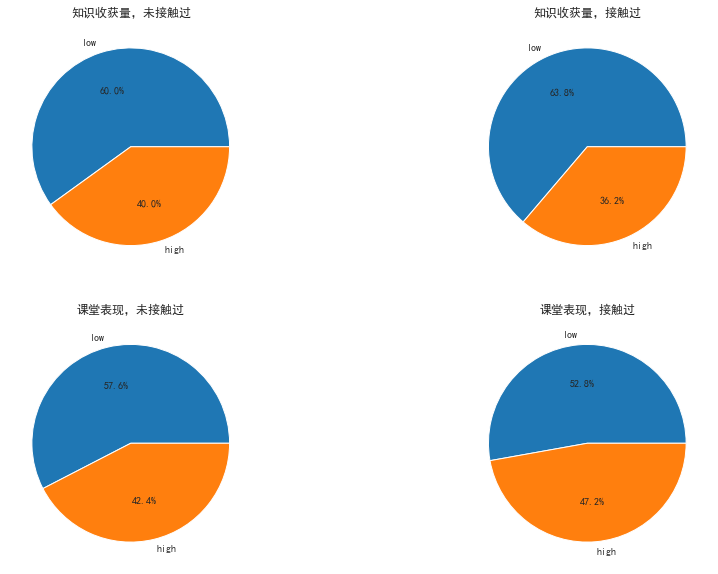

In [128]:
plt.figure(figsize=(15, 10))
labels = ['low', 'high']
plt.subplot(221)
no = [Usedk[0][0], Usedk[0][1]]
plt.pie(no, labels=labels, autopct='%1.1f%%')
plt.title("知识收获量，未接触过")


plt.subplot(222)
yes = [Usedk[1][0], Usedk[1][1]]
plt.pie(yes, labels=labels, autopct='%1.1f%%')
plt.title("知识收获量，接触过")


plt.subplot(223)
no = [Usedc[0][0], Usedc[0][1]]
plt.pie(no, labels=labels, autopct='%1.1f%%')
plt.title("课堂表现，未接触过")


plt.subplot(224)
yes = [Usedc[1][0], Usedc[1][1]]
plt.pie(yes, labels=labels, autopct='%1.1f%%')
plt.title("课堂表现，接触过")

快乐

In [130]:
Happyk = data2.groupby(['Happy with online education?', 'Knowledge increased after online education (comparatively)?'])['Knowledge increased after online education (comparatively)?'].count()
Happyk

Happy with online education?  Knowledge increased after online education (comparatively)?
0                             0                                                              3565
                              1                                                              2083
1                             0                                                              1991
                              1                                                              1144
Name: Knowledge increased after online education (comparatively)?, dtype: int64

In [131]:
Happyc = data2.groupby(['Happy with online education?', 'Class performance increased in online education?'])['Class performance increased in online education?'].count()
Happyc

Happy with online education?  Class performance increased in online education?
0                             0                                                   3031
                              1                                                   2617
1                             0                                                   1664
                              1                                                   1471
Name: Class performance increased in online education?, dtype: int64

Text(0.5, 1.0, '课堂表现与是否对网课教学感到快乐的关系')

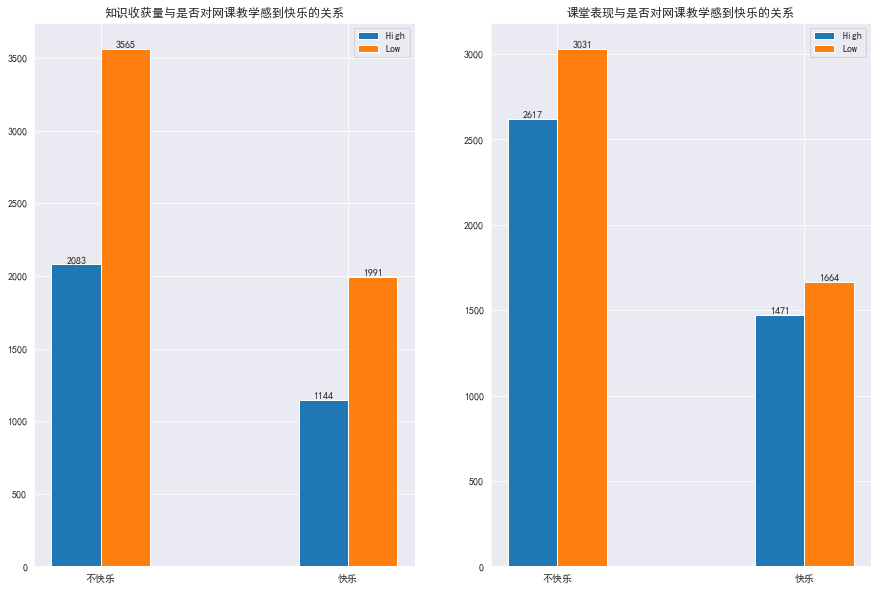

In [57]:
plt.figure(figsize=(15, 10))
plt.subplot(121)
High = [Happyk[0][1], Happyk[1][1]]
Low = [Happyk[0][0], Happyk[1][0]]


width = 0.2
x = np.arange(2)
plt.bar(x, High, width=width, label='High')
for i in range(2):
    plt.text(x[i], High[i], High[i], va='bottom', ha='center')
plt.bar(x+width, Low, width=width, label='Low')
for i in range(2):
    plt.text(x[i]+width, Low[i], Low[i], va='bottom', ha='center')
plt.xticks(x+width/2, labels=['不快乐', '快乐'])
plt.legend()
plt.title("知识收获量与是否对网课教学感到快乐的关系")


plt.subplot(122)
High = [Happyc[0][1], Happyc[1][1]]
Low = [Happyc[0][0], Happyc[1][0]]


width = 0.2
x = np.arange(2)
plt.bar(x, High, width=width, label='High')
for i in range(2):
    plt.text(x[i], High[i], High[i], va='bottom', ha='center')
plt.bar(x+width, Low, width=width, label='Low')
for i in range(2):
    plt.text(x[i]+width, Low[i], Low[i], va='bottom', ha='center')
plt.xticks(x+width/2, labels=['不快乐', '快乐'])
plt.legend()
plt.title("课堂表现与是否对网课教学感到快乐的关系")

Text(0.5, 1.0, '课堂表现，快乐')

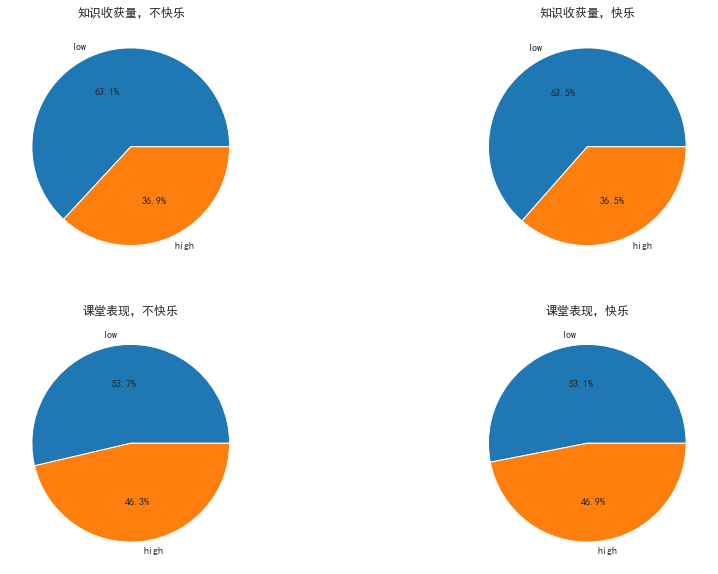

In [133]:
plt.figure(figsize=(15, 10))
labels = ['low', 'high']
plt.subplot(221)
no = [Happyk[0][0], Happyk[0][1]]
plt.pie(no, labels=labels, autopct='%1.1f%%')
plt.title("知识收获量，不快乐")


plt.subplot(222)
yes = [Happyk[1][0], Happyk[1][1]]
plt.pie(yes, labels=labels, autopct='%1.1f%%')
plt.title("知识收获量，快乐")


plt.subplot(223)
no = [Happyc[0][0], Happyc[0][1]]
plt.pie(no, labels=labels, autopct='%1.1f%%')
plt.title("课堂表现，不快乐")


plt.subplot(224)
yes = [Happyc[1][0], Happyc[1][1]]
plt.pie(yes, labels=labels, autopct='%1.1f%%')
plt.title("课堂表现，快乐")

学校所在区域

In [134]:
Areak = data2.groupby(['Education Institute Area?', 'Knowledge increased after online education (comparatively)?'])['Knowledge increased after online education (comparatively)?'].count()
Areak

Education Institute Area?  Knowledge increased after online education (comparatively)?
0                          0                                                              1124
                           1                                                               717
1                          0                                                              4432
                           1                                                              2510
Name: Knowledge increased after online education (comparatively)?, dtype: int64

In [135]:
Areac = data2.groupby(['Education Institute Area?', 'Class performance increased in online education?'])['Class performance increased in online education?'].count()
Areac

Education Institute Area?  Class performance increased in online education?
0                          0                                                    939
                           1                                                    902
1                          0                                                   3756
                           1                                                   3186
Name: Class performance increased in online education?, dtype: int64

Text(0.5, 1.0, '课堂表现与学校所在区域的关系')

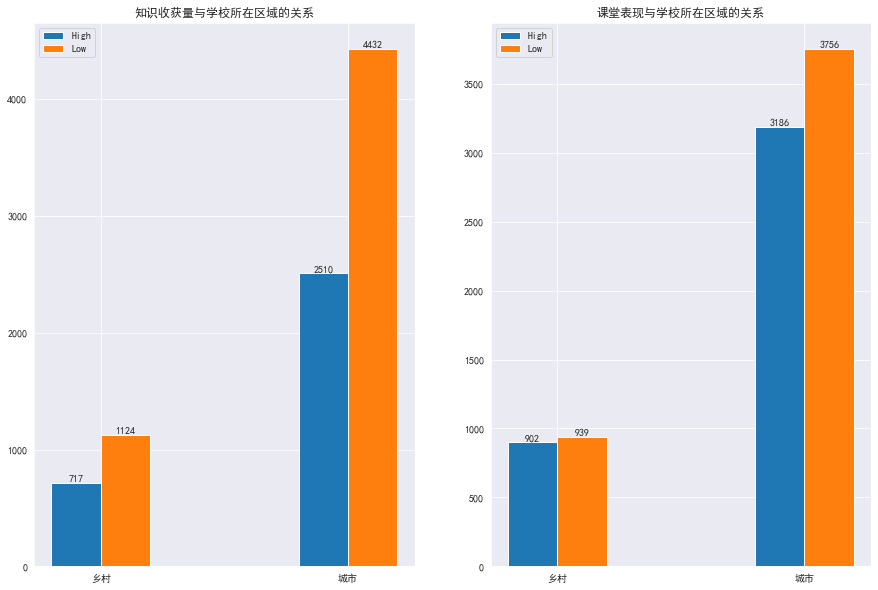

In [58]:
plt.figure(figsize=(15, 10))
plt.subplot(121)
High = [Areak[0][1], Areak[1][1]]
Low = [Areak[0][0], Areak[1][0]]


width = 0.2
x = np.arange(2)
plt.bar(x, High, width=width, label='High')
for i in range(2):
    plt.text(x[i], High[i], High[i], va='bottom', ha='center')
plt.bar(x+width, Low, width=width, label='Low')
for i in range(2):
    plt.text(x[i]+width, Low[i], Low[i], va='bottom', ha='center')
plt.xticks(x+width/2, labels=['乡村', '城市'])
plt.legend()
plt.title("知识收获量与学校所在区域的关系")


plt.subplot(122)
High = [Areac[0][1], Areac[1][1]]
Low = [Areac[0][0], Areac[1][0]]


width = 0.2
x = np.arange(2)
plt.bar(x, High, width=width, label='High')
for i in range(2):
    plt.text(x[i], High[i], High[i], va='bottom', ha='center')
plt.bar(x+width, Low, width=width, label='Low')
for i in range(2):
    plt.text(x[i]+width, Low[i], Low[i], va='bottom', ha='center')
plt.xticks(x+width/2, labels=['乡村', '城市'])
plt.legend()
plt.title("课堂表现与学校所在区域的关系")

Text(0.5, 1.0, '课堂表现，城市')

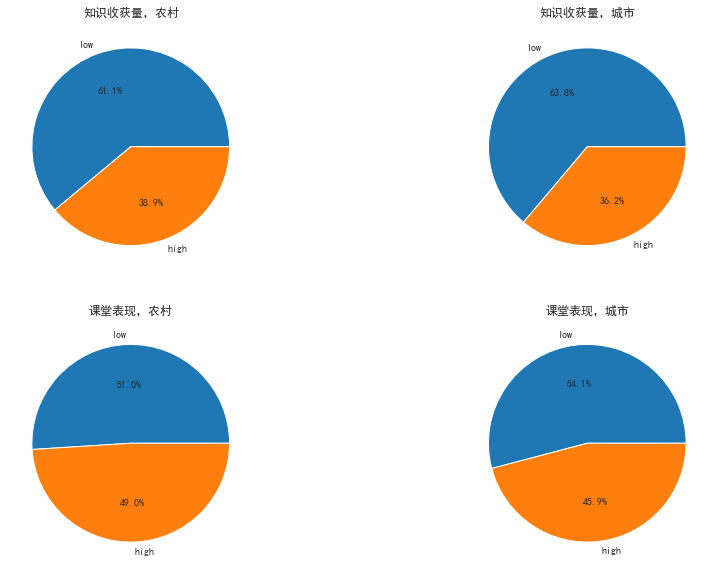

In [136]:
plt.figure(figsize=(15, 10))
labels = ['low', 'high']
plt.subplot(221)
no = [Areak[0][0], Areak[0][1]]
plt.pie(no, labels=labels, autopct='%1.1f%%')
plt.title("知识收获量，农村")


plt.subplot(222)
yes = [Areak[1][0], Areak[1][1]]
plt.pie(yes, labels=labels, autopct='%1.1f%%')
plt.title("知识收获量，城市")


plt.subplot(223)
no = [Areac[0][0], Areac[0][1]]
plt.pie(no, labels=labels, autopct='%1.1f%%')
plt.title("课堂表现，农村")


plt.subplot(224)
yes = [Areac[1][0], Areac[1][1]]
plt.pie(yes, labels=labels, autopct='%1.1f%%')
plt.title("课堂表现，城市")

是否有网络

In [49]:
Internet_availk = data2.groupby(['Have Internet availability?', 'Knowledge increased after online education (comparatively)?'])['Knowledge increased after online education (comparatively)?'].count()
Internet_availk

Have Internet availability?  Knowledge increased after online education (comparatively)?
0                            0                                                              1692
                             1                                                               976
1                            0                                                              3864
                             1                                                              2251
Name: Knowledge increased after online education (comparatively)?, dtype: int64

In [52]:
Internet_availc = data2.groupby(['Have Internet availability?', 'Class performance increased in online education?'])['Class performance increased in online education?'].count()
Internet_availc

Have Internet availability?  Class performance increased in online education?
0                            0                                                   1489
                             1                                                   1179
1                            0                                                   3206
                             1                                                   2909
Name: Class performance increased in online education?, dtype: int64

Text(0.5, 1.0, '课堂表现与是否有网络的关系')

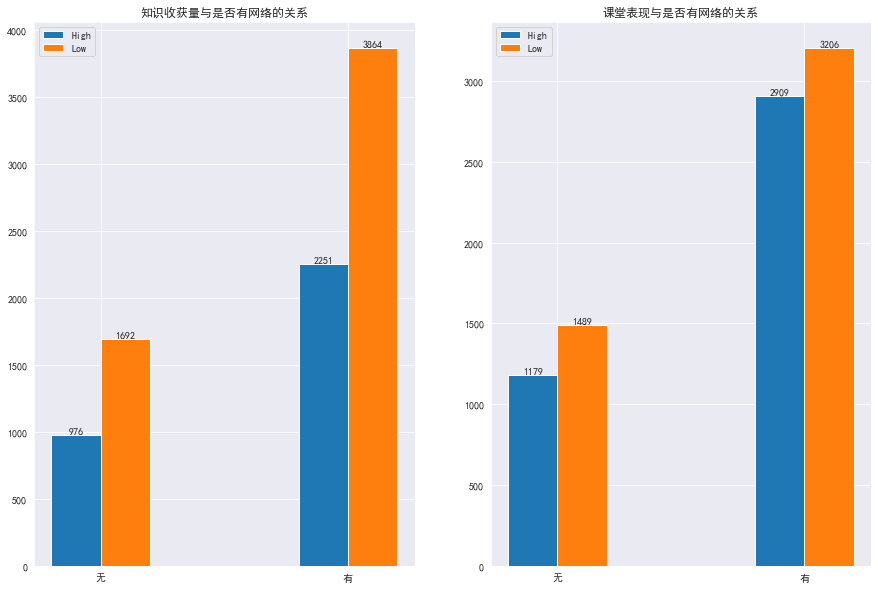

In [59]:
plt.figure(figsize=(15, 10))
plt.subplot(121)
High = [Internet_availk[0][1], Internet_availk[1][1]]
Low = [Internet_availk[0][0], Internet_availk[1][0]]


width = 0.2
x = np.arange(2)
plt.bar(x, High, width=width, label='High')
for i in range(2):
    plt.text(x[i], High[i], High[i], va='bottom', ha='center')
plt.bar(x+width, Low, width=width, label='Low')
for i in range(2):
    plt.text(x[i]+width, Low[i], Low[i], va='bottom', ha='center')
plt.xticks(x+width/2, labels=['无', '有'])
plt.legend()
plt.title("知识收获量与是否有网络的关系")


plt.subplot(122)
High = [Internet_availc[0][1], Internet_availc[1][1]]
Low = [Internet_availc[0][0], Internet_availc[1][0]]


width = 0.2
x = np.arange(2)
plt.bar(x, High, width=width, label='High')
for i in range(2):
    plt.text(x[i], High[i], High[i], va='bottom', ha='center')
plt.bar(x+width, Low, width=width, label='Low')
for i in range(2):
    plt.text(x[i]+width, Low[i], Low[i], va='bottom', ha='center')
plt.xticks(x+width/2, labels=['无', '有'])
plt.legend()
plt.title("课堂表现与是否有网络的关系")

Text(0.5, 1.0, '课堂表现，有')

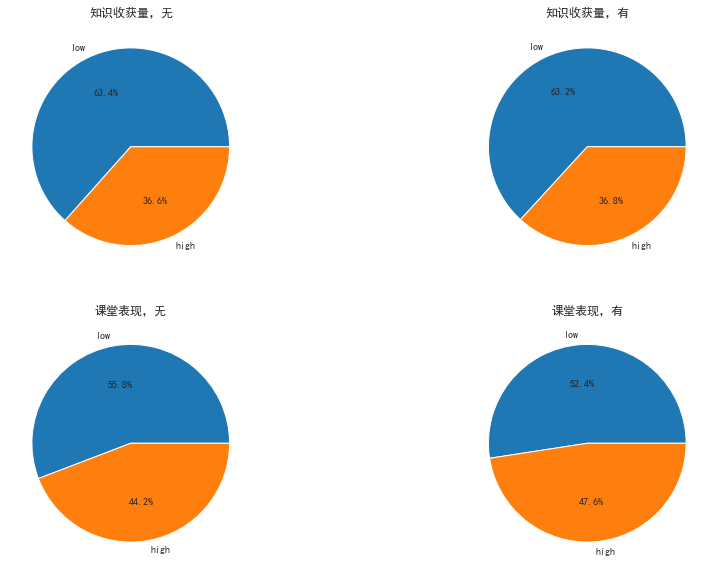

In [137]:
plt.figure(figsize=(15, 10))
labels = ['low', 'high']
plt.subplot(221)
no = [Internet_availk[0][0], Internet_availk[0][1]]
plt.pie(no, labels=labels, autopct='%1.1f%%')
plt.title("知识收获量，无")


plt.subplot(222)
yes = [Internet_availk[1][0], Internet_availk[1][1]]
plt.pie(yes, labels=labels, autopct='%1.1f%%')
plt.title("知识收获量，有")


plt.subplot(223)
no = [Internet_availc[0][0], Internet_availc[0][1]]
plt.pie(no, labels=labels, autopct='%1.1f%%')
plt.title("课堂表现，无")


plt.subplot(224)
yes = [Internet_availc[1][0], Internet_availc[1][1]]
plt.pie(yes, labels=labels, autopct='%1.1f%%')
plt.title("课堂表现，有")

网络类型

In [54]:
Broad_mobilek = data2.groupby(['Broadband / Mobile Internet?', 'Knowledge increased after online education (comparatively)?'])['Knowledge increased after online education (comparatively)?'].count()
Broad_mobilek

Broadband / Mobile Internet?  Knowledge increased after online education (comparatively)?
0                             0                                                              2793
                              1                                                              1635
1                             0                                                              2763
                              1                                                              1592
Name: Knowledge increased after online education (comparatively)?, dtype: int64

In [55]:
Broad_mobilec = data2.groupby(['Broadband / Mobile Internet?', 'Class performance increased in online education?'])['Class performance increased in online education?'].count()
Broad_mobilec

Broadband / Mobile Internet?  Class performance increased in online education?
0                             0                                                   2414
                              1                                                   2014
1                             0                                                   2281
                              1                                                   2074
Name: Class performance increased in online education?, dtype: int64

Text(0.5, 1.0, '课堂表现与网络类型的关系')

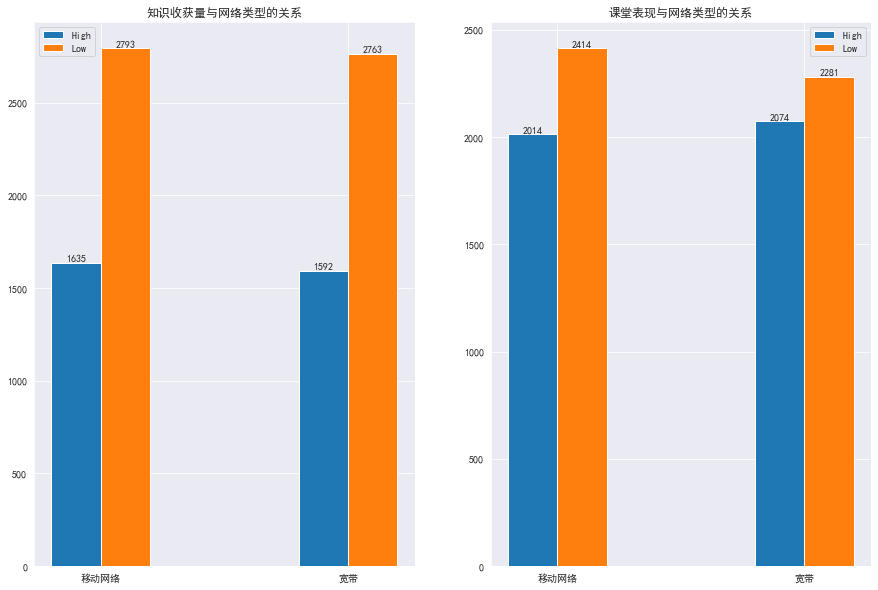

In [60]:
plt.figure(figsize=(15, 10))
plt.subplot(121)
High = [Broad_mobilek[0][1], Broad_mobilek[1][1]]
Low = [Broad_mobilek[0][0], Broad_mobilek[1][0]]


width = 0.2
x = np.arange(2)
plt.bar(x, High, width=width, label='High')
for i in range(2):
    plt.text(x[i], High[i], High[i], va='bottom', ha='center')
plt.bar(x+width, Low, width=width, label='Low')
for i in range(2):
    plt.text(x[i]+width, Low[i], Low[i], va='bottom', ha='center')
plt.xticks(x+width/2, labels=['移动网络', '宽带'])
plt.legend()
plt.title("知识收获量与网络类型的关系")


plt.subplot(122)
High = [Broad_mobilec[0][1], Broad_mobilec[1][1]]
Low = [Broad_mobilec[0][0], Broad_mobilec[1][0]]


width = 0.2
x = np.arange(2)
plt.bar(x, High, width=width, label='High')
for i in range(2):
    plt.text(x[i], High[i], High[i], va='bottom', ha='center')
plt.bar(x+width, Low, width=width, label='Low')
for i in range(2):
    plt.text(x[i]+width, Low[i], Low[i], va='bottom', ha='center')
plt.xticks(x+width/2, labels=['移动网络', '宽带'])
plt.legend()
plt.title("课堂表现与网络类型的关系")

Text(0.5, 1.0, '课堂表现，宽带')

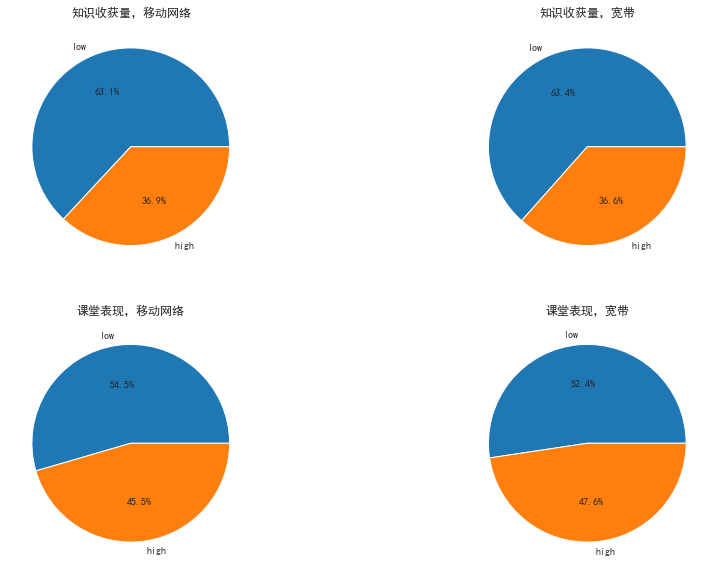

In [138]:
plt.figure(figsize=(15, 10))
labels = ['low', 'high']
plt.subplot(221)
no = [Broad_mobilek[0][0], Broad_mobilek[0][1]]
plt.pie(no, labels=labels, autopct='%1.1f%%')
plt.title("知识收获量，移动网络")


plt.subplot(222)
yes = [Broad_mobilek[1][0], Broad_mobilek[1][1]]
plt.pie(yes, labels=labels, autopct='%1.1f%%')
plt.title("知识收获量，宽带")


plt.subplot(223)
no = [Broad_mobilec[0][0], Broad_mobilec[0][1]]
plt.pie(no, labels=labels, autopct='%1.1f%%')
plt.title("课堂表现，移动网络")


plt.subplot(224)
yes = [Broad_mobilec[1][0], Broad_mobilec[1][1]]
plt.pie(yes, labels=labels, autopct='%1.1f%%')
plt.title("课堂表现，宽带")

学校性质

In [61]:
Institution_typek = data2.groupby(['Institute Type', 'Knowledge increased after online education (comparatively)?'])['Knowledge increased after online education (comparatively)?'].count()
Institution_typek

Institute Type  Knowledge increased after online education (comparatively)?
0               0                                                              3630
                1                                                              2055
1               0                                                              1926
                1                                                              1172
Name: Knowledge increased after online education (comparatively)?, dtype: int64

In [62]:
Institution_typec = data2.groupby(['Institute Type', 'Class performance increased in online education?'])['Class performance increased in online education?'].count()
Institution_typec

Institute Type  Class performance increased in online education?
0               0                                                   3061
                1                                                   2624
1               0                                                   1634
                1                                                   1464
Name: Class performance increased in online education?, dtype: int64

Text(0.5, 1.0, '课堂表现与学校性质的关系')

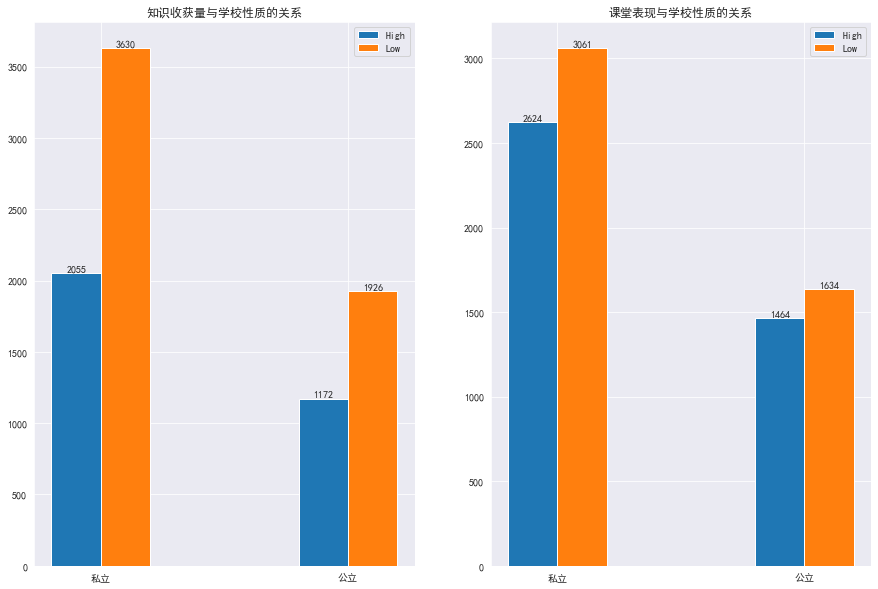

In [66]:
plt.figure(figsize=(15, 10))
plt.subplot(121)
High = [Institution_typek[0][1], Institution_typek[1][1]]
Low = [Institution_typek[0][0], Institution_typek[1][0]]


width = 0.2
x = np.arange(2)
plt.bar(x, High, width=width, label='High')
for i in range(2):
    plt.text(x[i], High[i], High[i], va='bottom', ha='center')
plt.bar(x+width, Low, width=width, label='Low')
for i in range(2):
    plt.text(x[i]+width, Low[i], Low[i], va='bottom', ha='center')
plt.xticks(x+width/2, labels=['私立', '公立'])
plt.legend()
plt.title("知识收获量与学校性质的关系")


plt.subplot(122)
High = [Institution_typec[0][1], Institution_typec[1][1]]
Low = [Institution_typec[0][0], Institution_typec[1][0]]


width = 0.2
x = np.arange(2)
plt.bar(x, High, width=width, label='High')
for i in range(2):
    plt.text(x[i], High[i], High[i], va='bottom', ha='center')
plt.bar(x+width, Low, width=width, label='Low')
for i in range(2):
    plt.text(x[i]+width, Low[i], Low[i], va='bottom', ha='center')
plt.xticks(x+width/2, labels=['私立', '公立'])
plt.legend()
plt.title("课堂表现与学校性质的关系")

Text(0.5, 1.0, '课堂表现，公立')

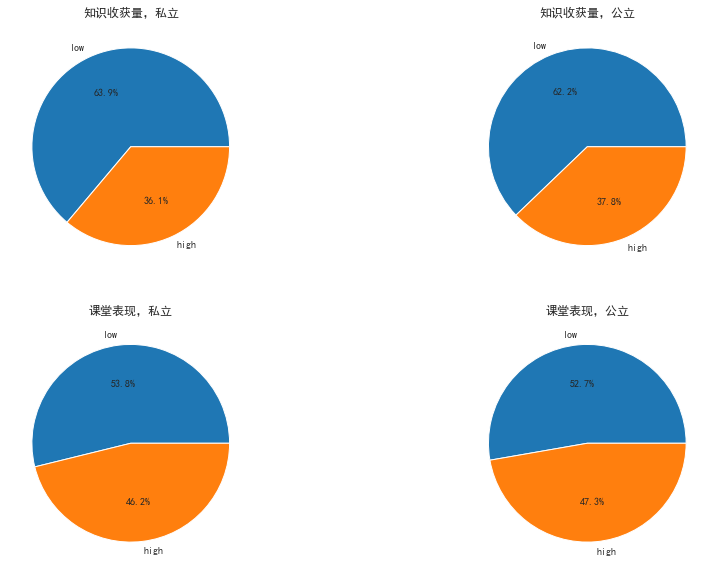

In [139]:
plt.figure(figsize=(15, 10))
labels = ['low', 'high']
plt.subplot(221)
no = [Institution_typek[0][0], Institution_typek[0][1]]
plt.pie(no, labels=labels, autopct='%1.1f%%')
plt.title("知识收获量，私立")


plt.subplot(222)
yes = [Institution_typek[1][0], Institution_typek[1][1]]
plt.pie(yes, labels=labels, autopct='%1.1f%%')
plt.title("知识收获量，公立")


plt.subplot(223)
no = [Institution_typec[0][0], Institution_typec[0][1]]
plt.pie(no, labels=labels, autopct='%1.1f%%')
plt.title("课堂表现，私立")


plt.subplot(224)
yes = [Institution_typec[1][0], Institution_typec[1][1]]
plt.pie(yes, labels=labels, autopct='%1.1f%%')
plt.title("课堂表现，公立")

学习地

In [64]:
currentk = data2.groupby(['Current location (During Study) ?', 'Knowledge increased after online education (comparatively)?'])['Knowledge increased after online education (comparatively)?'].count()
currentk

Current location (During Study) ?  Knowledge increased after online education (comparatively)?
0                                  0                                                              2520
                                   1                                                              1519
1                                  0                                                              3036
                                   1                                                              1708
Name: Knowledge increased after online education (comparatively)?, dtype: int64

In [65]:
currentc = data2.groupby(['Current location (During Study) ?', 'Class performance increased in online education?'])['Class performance increased in online education?'].count()
currentc

Current location (During Study) ?  Class performance increased in online education?
0                                  0                                                   2184
                                   1                                                   1855
1                                  0                                                   2511
                                   1                                                   2233
Name: Class performance increased in online education?, dtype: int64

Text(0.5, 1.0, '课堂表现与学习地的关系')

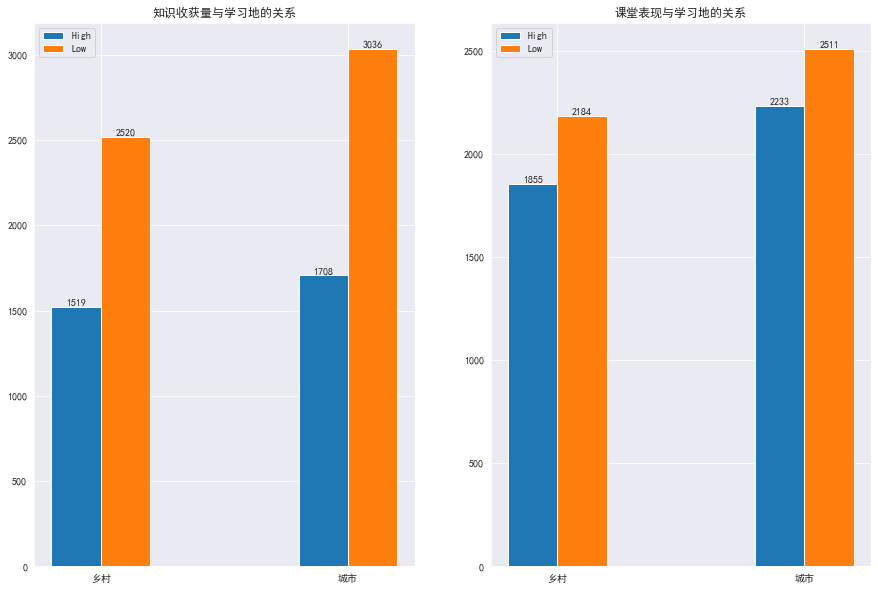

In [67]:
plt.figure(figsize=(15, 10))
plt.subplot(121)
High = [currentk[0][1], currentk[1][1]]
Low = [currentk[0][0], currentk[1][0]]


width = 0.2
x = np.arange(2)
plt.bar(x, High, width=width, label='High')
for i in range(2):
    plt.text(x[i], High[i], High[i], va='bottom', ha='center')
plt.bar(x+width, Low, width=width, label='Low')
for i in range(2):
    plt.text(x[i]+width, Low[i], Low[i], va='bottom', ha='center')
plt.xticks(x+width/2, labels=['乡村', '城市'])
plt.legend()
plt.title("知识收获量与学习地的关系")


plt.subplot(122)
High = [currentc[0][1], currentc[1][1]]
Low = [currentc[0][0], currentc[1][0]]


width = 0.2
x = np.arange(2)
plt.bar(x, High, width=width, label='High')
for i in range(2):
    plt.text(x[i], High[i], High[i], va='bottom', ha='center')
plt.bar(x+width, Low, width=width, label='Low')
for i in range(2):
    plt.text(x[i]+width, Low[i], Low[i], va='bottom', ha='center')
plt.xticks(x+width/2, labels=['乡村', '城市'])
plt.legend()
plt.title("课堂表现与学习地的关系")

Text(0.5, 1.0, '课堂表现，城市')

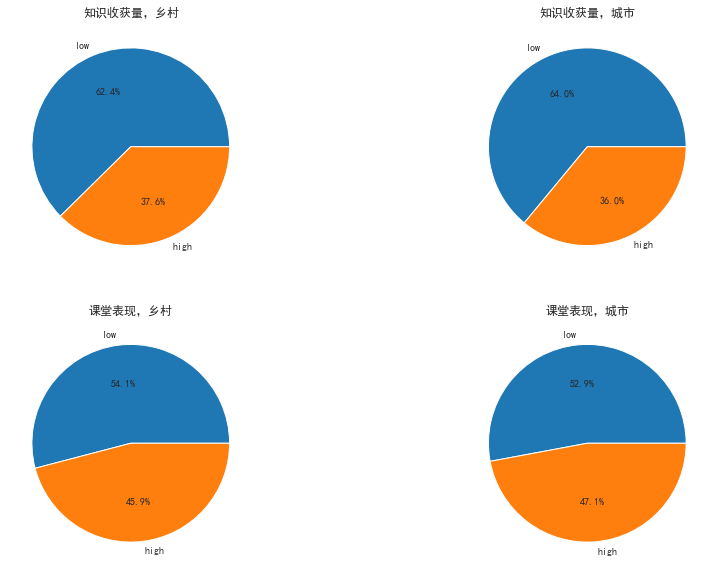

In [140]:
plt.figure(figsize=(15, 10))
labels = ['low', 'high']
plt.subplot(221)
no = [currentk[0][0], currentk[0][1]]
plt.pie(no, labels=labels, autopct='%1.1f%%')
plt.title("知识收获量，乡村")


plt.subplot(222)
yes = [currentk[1][0], currentk[1][1]]
plt.pie(yes, labels=labels, autopct='%1.1f%%')
plt.title("知识收获量，城市")


plt.subplot(223)
no = [currentc[0][0], currentc[0][1]]
plt.pie(no, labels=labels, autopct='%1.1f%%')
plt.title("课堂表现，乡村")


plt.subplot(224)
yes = [currentc[1][0], currentc[1][1]]
plt.pie(yes, labels=labels, autopct='%1.1f%%')
plt.title("课堂表现，城市")

网课前学习时间

In [68]:
Beforek = data2.groupby(['Total hours of study before online education?', 'Knowledge increased after online education (comparatively)?'])['Knowledge increased after online education (comparatively)?'].count()
Beforek

Total hours of study before online education?  Knowledge increased after online education (comparatively)?
3                                              0                                                               909
                                               1                                                               556
4                                              0                                                              1858
                                               1                                                              1074
5                                              0                                                              1825
                                               1                                                              1060
6                                              0                                                               964
                                               1                                        

In [69]:
Beforec = data2.groupby(['Total hours of study before online education?', 'Class performance increased in online education?'])['Class performance increased in online education?'].count()
Beforec

Total hours of study before online education?  Class performance increased in online education?
3                                              0                                                    788
                                               1                                                    677
4                                              0                                                   1530
                                               1                                                   1402
5                                              0                                                   1577
                                               1                                                   1308
6                                              0                                                    800
                                               1                                                    701
Name: Class performance increased in online education?, dtype: int64

Text(0.5, 1.0, '课堂表现与网课前学习时间的关系')

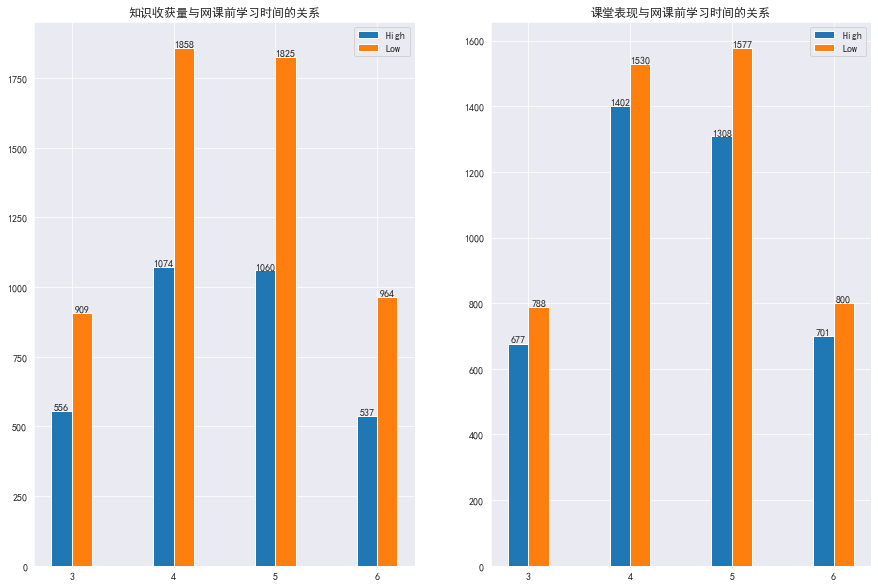

In [72]:
plt.figure(figsize=(15, 10))
plt.subplot(121)
High = [Beforek[3][1], Beforek[4][1], Beforek[5][1], Beforek[6][1]]
Low = [Beforek[3][0], Beforek[4][0], Beforek[5][0], Beforek[6][0]]


width = 0.2
x = np.arange(4)
plt.bar(x, High, width=width, label='High')
for i in range(4):
    plt.text(x[i], High[i], High[i], va='bottom', ha='center')
plt.bar(x+width, Low, width=width, label='Low')
for i in range(4):
    plt.text(x[i]+width, Low[i], Low[i], va='bottom', ha='center')
plt.xticks(x+width/2, labels=[3, 4, 5, 6])
plt.legend()
plt.title("知识收获量与网课前学习时间的关系")


plt.subplot(122)
High = [Beforec[3][1], Beforec[4][1], Beforec[5][1], Beforec[6][1]]
Low = [Beforec[3][0], Beforec[4][0], Beforec[5][0], Beforec[6][0]]


width = 0.2
x = np.arange(4)
plt.bar(x, High, width=width, label='High')
for i in range(4):
    plt.text(x[i], High[i], High[i], va='bottom', ha='center')
plt.bar(x+width, Low, width=width, label='Low')
for i in range(4):
    plt.text(x[i]+width, Low[i], Low[i], va='bottom', ha='center')
plt.xticks(x+width/2, labels=[3, 4, 5, 6])
plt.legend()
plt.title("课堂表现与网课前学习时间的关系")

In [73]:
Afterk = data2.groupby(['Total hours of study after online education?', 'Knowledge increased after online education (comparatively)?'])['Knowledge increased after online education (comparatively)?'].count()
Afterk

Total hours of study after online education?  Knowledge increased after online education (comparatively)?
2                                             0                                                              1434
                                              1                                                               840
3                                             0                                                              2758
                                              1                                                              1624
4                                             0                                                              1364
                                              1                                                               763
Name: Knowledge increased after online education (comparatively)?, dtype: int64

In [74]:
Afterc = data2.groupby(['Total hours of study after online education?', 'Class performance increased in online education?'])['Class performance increased in online education?'].count()
Afterc

Total hours of study after online education?  Class performance increased in online education?
2                                             0                                                   1207
                                              1                                                   1067
3                                             0                                                   2345
                                              1                                                   2037
4                                             0                                                   1143
                                              1                                                    984
Name: Class performance increased in online education?, dtype: int64

Text(0.5, 1.0, '课堂表现与网课后学习时间的关系')

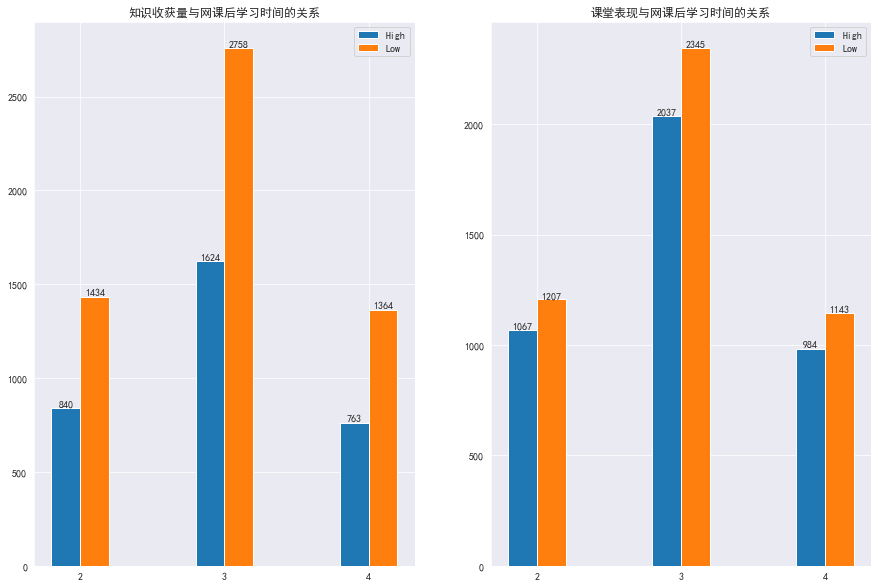

In [77]:
plt.figure(figsize=(15, 10))
plt.subplot(121)
High = [Afterk[2][1], Afterk[3][1], Afterk[4][1]]
Low = [Afterk[2][0], Afterk[3][0], Afterk[4][0]]


width = 0.2
x = np.arange(3)
plt.bar(x, High, width=width, label='High')
for i in range(3):
    plt.text(x[i], High[i], High[i], va='bottom', ha='center')
plt.bar(x+width, Low, width=width, label='Low')
for i in range(3):
    plt.text(x[i]+width, Low[i], Low[i], va='bottom', ha='center')
plt.xticks(x+width/2, labels=[2, 3, 4])
plt.legend()
plt.title("知识收获量与网课后学习时间的关系")


plt.subplot(122)
High = [Afterc[2][1], Afterc[3][1], Afterc[4][1]]
Low = [Afterc[2][0], Afterc[3][0], Afterc[4][0]]


width = 0.2
x = np.arange(3)
plt.bar(x, High, width=width, label='High')
for i in range(3):
    plt.text(x[i], High[i], High[i], va='bottom', ha='center')
plt.bar(x+width, Low, width=width, label='Low')
for i in range(3):
    plt.text(x[i]+width, Low[i], Low[i], va='bottom', ha='center')
plt.xticks(x+width/2, labels=[2, 3, 4])
plt.legend()
plt.title("课堂表现与网课后学习时间的关系")

性别

In [78]:
Genderk = data2.groupby(['Gender', 'Knowledge increased after online education (comparatively)?'])['Knowledge increased after online education (comparatively)?'].count()
Genderk

Gender  Knowledge increased after online education (comparatively)?
0       0                                                              3028
        1                                                              1843
1       0                                                              2528
        1                                                              1384
Name: Knowledge increased after online education (comparatively)?, dtype: int64

In [79]:
Genderc = data2.groupby(['Gender', 'Class performance increased in online education?'])['Class performance increased in online education?'].count()
Genderc

Gender  Class performance increased in online education?
0       0                                                   2678
        1                                                   2193
1       0                                                   2017
        1                                                   1895
Name: Class performance increased in online education?, dtype: int64

Text(0.5, 1.0, '课堂表现与性别的关系')

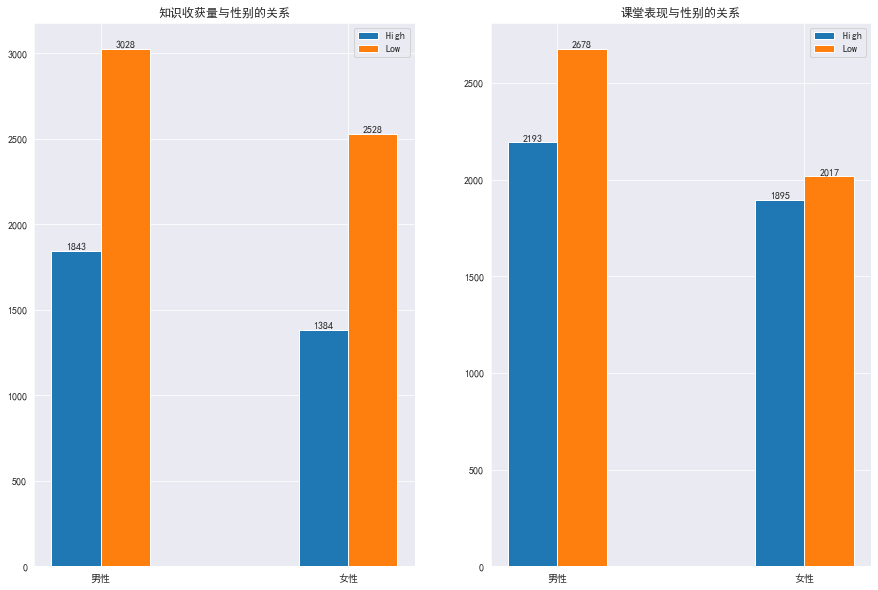

In [80]:
plt.figure(figsize=(15, 10))
plt.subplot(121)
High = [Genderk[0][1], Genderk[1][1]]
Low = [Genderk[0][0], Genderk[1][0]]


width = 0.2
x = np.arange(2)
plt.bar(x, High, width=width, label='High')
for i in range(2):
    plt.text(x[i], High[i], High[i], va='bottom', ha='center')
plt.bar(x+width, Low, width=width, label='Low')
for i in range(2):
    plt.text(x[i]+width, Low[i], Low[i], va='bottom', ha='center')
plt.xticks(x+width/2, labels=['男性', '女性'])
plt.legend()
plt.title("知识收获量与性别的关系")


plt.subplot(122)
High = [Genderc[0][1], Genderc[1][1]]
Low = [Genderc[0][0], Genderc[1][0]]


width = 0.2
x = np.arange(2)
plt.bar(x, High, width=width, label='High')
for i in range(2):
    plt.text(x[i], High[i], High[i], va='bottom', ha='center')
plt.bar(x+width, Low, width=width, label='Low')
for i in range(2):
    plt.text(x[i]+width, Low[i], Low[i], va='bottom', ha='center')
plt.xticks(x+width/2, labels=['男性', '女性'])
plt.legend()
plt.title("课堂表现与性别的关系")

Text(0.5, 1.0, '课堂表现，女性')

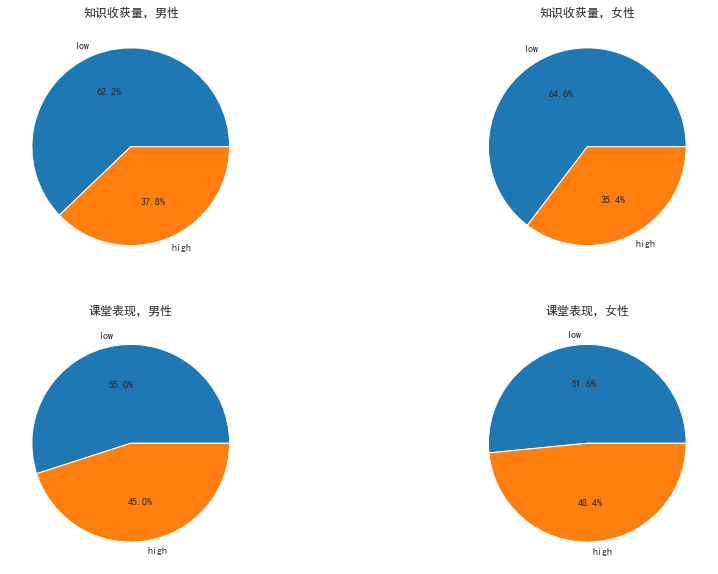

In [141]:
plt.figure(figsize=(15, 10))
labels = ['low', 'high']
plt.subplot(221)
no = [Genderk[0][0], Genderk[0][1]]
plt.pie(no, labels=labels, autopct='%1.1f%%')
plt.title("知识收获量，男性")


plt.subplot(222)
yes = [Genderk[1][0], Genderk[1][1]]
plt.pie(yes, labels=labels, autopct='%1.1f%%')
plt.title("知识收获量，女性")


plt.subplot(223)
no = [Genderc[0][0], Genderc[0][1]]
plt.pie(no, labels=labels, autopct='%1.1f%%')
plt.title("课堂表现，男性")


plt.subplot(224)
yes = [Genderc[1][0], Genderc[1][1]]
plt.pie(yes, labels=labels, autopct='%1.1f%%')
plt.title("课堂表现，女性")

是否经历过线上教学

In [81]:
Facedk = data2.groupby(['Faced any issue with online class?', 'Knowledge increased after online education (comparatively)?'])['Knowledge increased after online education (comparatively)?'].count()
Facedk

Faced any issue with online class?  Knowledge increased after online education (comparatively)?
0                                   0                                                              2102
                                    1                                                              1222
1                                   0                                                              3454
                                    1                                                              2005
Name: Knowledge increased after online education (comparatively)?, dtype: int64

In [82]:
Facedc = data2.groupby(['Faced any issue with online class?', 'Class performance increased in online education?'])['Class performance increased in online education?'].count()
Facedc

Faced any issue with online class?  Class performance increased in online education?
0                                   0                                                   1764
                                    1                                                   1560
1                                   0                                                   2931
                                    1                                                   2528
Name: Class performance increased in online education?, dtype: int64

Text(0.5, 1.0, '课堂表现与是否经历过网课的关系')

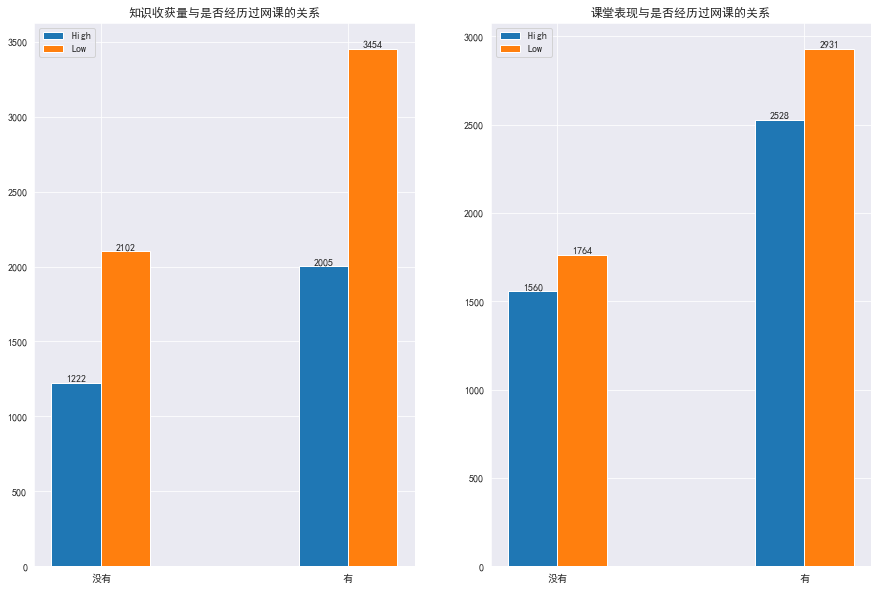

In [83]:
plt.figure(figsize=(15, 10))
plt.subplot(121)
High = [Facedk[0][1], Facedk[1][1]]
Low = [Facedk[0][0], Facedk[1][0]]


width = 0.2
x = np.arange(2)
plt.bar(x, High, width=width, label='High')
for i in range(2):
    plt.text(x[i], High[i], High[i], va='bottom', ha='center')
plt.bar(x+width, Low, width=width, label='Low')
for i in range(2):
    plt.text(x[i]+width, Low[i], Low[i], va='bottom', ha='center')
plt.xticks(x+width/2, labels=['没有', '有'])
plt.legend()
plt.title("知识收获量与是否经历过网课的关系")


plt.subplot(122)
High = [Facedc[0][1], Facedc[1][1]]
Low = [Facedc[0][0], Facedc[1][0]]


width = 0.2
x = np.arange(2)
plt.bar(x, High, width=width, label='High')
for i in range(2):
    plt.text(x[i], High[i], High[i], va='bottom', ha='center')
plt.bar(x+width, Low, width=width, label='Low')
for i in range(2):
    plt.text(x[i]+width, Low[i], Low[i], va='bottom', ha='center')
plt.xticks(x+width/2, labels=['没有', '有'])
plt.legend()
plt.title("课堂表现与是否经历过网课的关系")

Text(0.5, 1.0, '课堂表现，有')

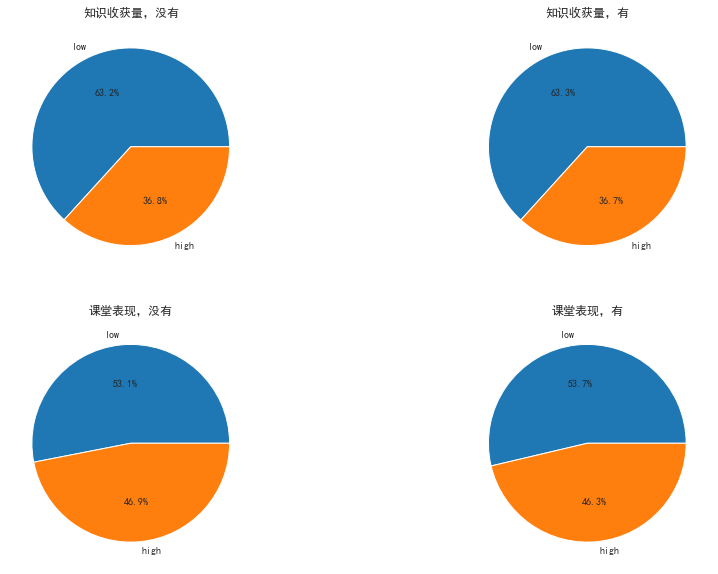

In [142]:
plt.figure(figsize=(15, 10))
labels = ['low', 'high']
plt.subplot(221)
no = [Facedk[0][0], Facedk[0][1]]
plt.pie(no, labels=labels, autopct='%1.1f%%')
plt.title("知识收获量，没有")


plt.subplot(222)
yes = [Facedk[1][0], Facedk[1][1]]
plt.pie(yes, labels=labels, autopct='%1.1f%%')
plt.title("知识收获量，有")


plt.subplot(223)
no = [Facedc[0][0], Facedc[0][1]]
plt.pie(no, labels=labels, autopct='%1.1f%%')
plt.title("课堂表现，没有")


plt.subplot(224)
yes = [Facedc[1][0], Facedc[1][1]]
plt.pie(yes, labels=labels, autopct='%1.1f%%')
plt.title("课堂表现，有")

喜欢的设备

In [84]:
Preferredk = data2.groupby(['Preferred device for an online course', 'Knowledge increased after online education (comparatively)?'])['Knowledge increased after online education (comparatively)?'].count()
Preferredk

Preferred device for an online course  Knowledge increased after online education (comparatively)?
0                                      0                                                              1987
                                       1                                                              1189
1                                      0                                                              3569
                                       1                                                              2038
Name: Knowledge increased after online education (comparatively)?, dtype: int64

In [85]:
Preferredc = data2.groupby(['Preferred device for an online course', 'Class performance increased in online education?'])['Class performance increased in online education?'].count()
Preferredc

Preferred device for an online course  Class performance increased in online education?
0                                      0                                                   1719
                                       1                                                   1457
1                                      0                                                   2976
                                       1                                                   2631
Name: Class performance increased in online education?, dtype: int64

Text(0.5, 1.0, '课堂表现与偏好的设备的关系')

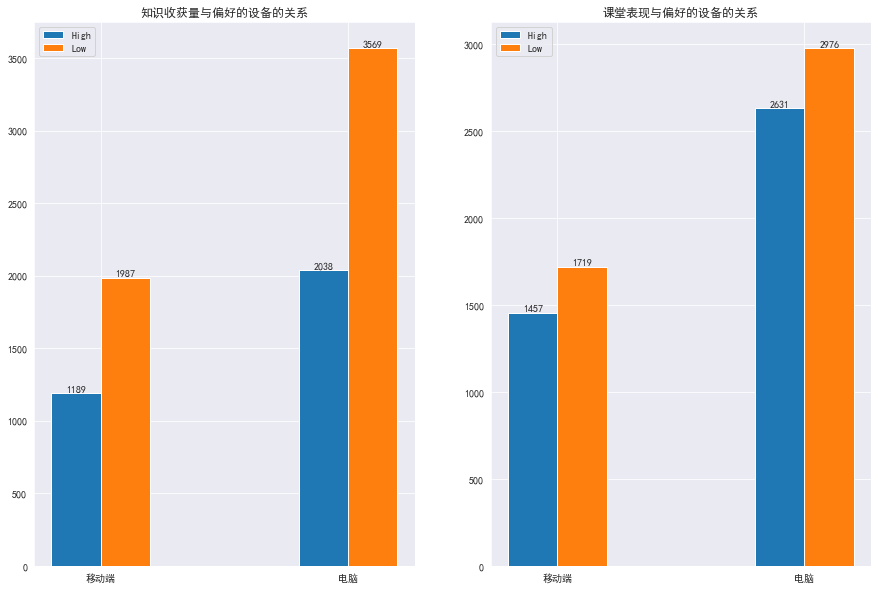

In [86]:
plt.figure(figsize=(15, 10))
plt.subplot(121)
High = [Preferredk[0][1], Preferredk[1][1]]
Low = [Preferredk[0][0], Preferredk[1][0]]


width = 0.2
x = np.arange(2)
plt.bar(x, High, width=width, label='High')
for i in range(2):
    plt.text(x[i], High[i], High[i], va='bottom', ha='center')
plt.bar(x+width, Low, width=width, label='Low')
for i in range(2):
    plt.text(x[i]+width, Low[i], Low[i], va='bottom', ha='center')
plt.xticks(x+width/2, labels=['移动端', '电脑'])
plt.legend()
plt.title("知识收获量与偏好的设备的关系")


plt.subplot(122)
High = [Preferredc[0][1], Preferredc[1][1]]
Low = [Preferredc[0][0], Preferredc[1][0]]


width = 0.2
x = np.arange(2)
plt.bar(x, High, width=width, label='High')
for i in range(2):
    plt.text(x[i], High[i], High[i], va='bottom', ha='center')
plt.bar(x+width, Low, width=width, label='Low')
for i in range(2):
    plt.text(x[i]+width, Low[i], Low[i], va='bottom', ha='center')
plt.xticks(x+width/2, labels=['移动端', '电脑'])
plt.legend()
plt.title("课堂表现与偏好的设备的关系")

Text(0.5, 1.0, '课堂表现，电脑')

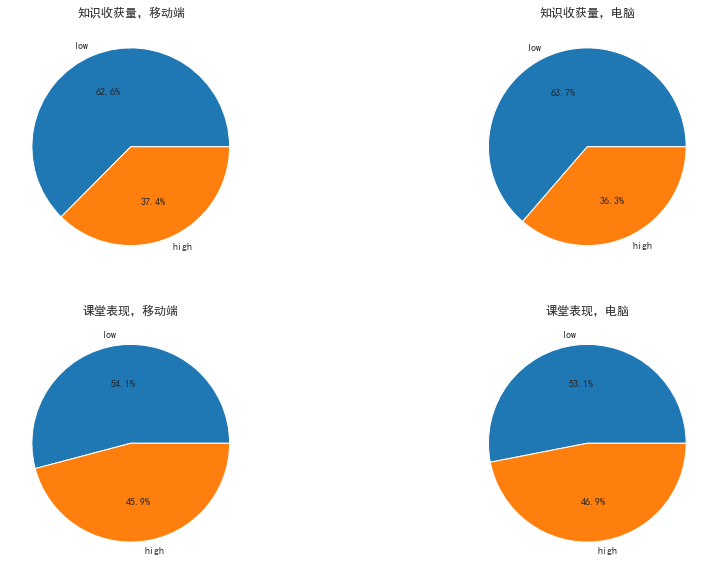

In [144]:
plt.figure(figsize=(15, 10))
labels = ['low', 'high']
plt.subplot(221)
no = [Preferredk[0][0], Preferredk[0][1]]
plt.pie(no, labels=labels, autopct='%1.1f%%')
plt.title("知识收获量，移动端")


plt.subplot(222)
yes = [Preferredk[1][0], Preferredk[1][1]]
plt.pie(yes, labels=labels, autopct='%1.1f%%')
plt.title("知识收获量，电脑")


plt.subplot(223)
no = [Preferredc[0][0], Preferredc[0][1]]
plt.pie(no, labels=labels, autopct='%1.1f%%')
plt.title("课堂表现，移动端")


plt.subplot(224)
yes = [Preferredc[1][0], Preferredc[1][1]]
plt.pie(yes, labels=labels, autopct='%1.1f%%')
plt.title("课堂表现，电脑")